### Importing packages

In [6]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [7]:
df = read_csv(r'ndtv_data_final.csv')

In [8]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [9]:
df.shape

(1359, 22)

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True) # Index column

In [11]:
df.shape

(1359, 21)

In [12]:
class EDABasic:
    def __init__(self, df, numcols, catcols):
        self.df = df
        self.numcols = numcols
        self.catcols = catcols
        self.basicEDA()
        
    def basicEDA(self):
        '''
            function: basicEDA -> This function is used for the basic EDA of data frame such as shape, statstic summary
            arg: None
            return: None
        '''
        # checking the shape of the data frame
        shape = self.df.shape
        print("SHAPE OF DATAFRAME:")
        print('Columns = {}'.format(shape[0]))
        print('Rows = {}\n\n'.format(shape[1]))
        
        # cheking the missing values
        nullValues = self.df.isna().sum()
        noNull = 'No Null values' if nullValues.sum == 0 else nullValues
        print('Checking the missing values:\n')
        print('Missing values:\n{}\n\n'.format(noNull))
        
        # checking the duplicates
        duplicates = self.df.duplicated().sum()
        noduplicates = 'No Duplicat values' if duplicates == 0 else duplicates
        print('Checking the Duplicate values:')
        print('Duplicate values = {}\n\n'.format(noduplicates))
        
        # statstic summary of data frame
        print('The static summary: ')
        des = self.df.describe().T.reset_index()
        des.rename({'Index': 'Stats'}, inplace=True)
        dasData = des.to_dict(orient='list')
        table = tabulate(dasData, headers='keys', tablefmt='github', numalign='right') # tabulate converts data into table format
        print(table, '\n\n')
        
        # information of the data set
        print('The information: ')
        print(self.df.info(),'\n\n')
        
    def colPrice(self):
        '''
            function: colPrice -> shows the distribution of price in against other numaric columns in data frame using line graph
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        plt.figure(figsize=(5, 5))
        
        for column in range(0, len(numlist)-1, 2):
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            sns.lineplot(x=self.numcols[numlist[column]], y=self.df['Price'], data=self.numcols, ax=axes[0])
            axes[0].set_title(numlist[column])

            sns.lineplot(x=self.numcols[numlist[column + 1]], y=self.df['Price'], data=self.numcols, ax=axes[1])
            axes[1].set_title(numlist[column + 1])

            plt.show()
        
    def calculateOutlires(self):
        '''
            function: calculateOutlires -> calculates the outlires in each numarical columns using IQR method
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        dataList = [['Name', 'q1', 'q3', 'IQR', 'Count']]
        for column in range(len(numlist)-1):
            q1 = self.numcols[numlist[column]].quantile(0.25)
            q3 = self.numcols[numlist[column]].quantile(0.75)

            IQR = q3 - q1

            lB = q1 - 1.5 * IQR
            uB = q3 + 1.5 * IQR
            dataList.append([numlist[column],q1,q3,IQR,((self.numcols[numlist[column]] < lB) | (self.numcols[numlist[column]] > uB)).sum()])
        table = tabulate(dataList, tablefmt='pretty') # tabulate converts data into table format
        print(table)
    
    def outliresBox(self):
        '''
            function: outliresBox -> shows the distribution of outlires using box plots
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        numlist = self.numcols.columns.tolist()
        for column in range(0, len(numlist)-1, 2):
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            
            sns.boxplot(self.numcols[numlist[column]], ax=axes[0])
            axes[0].set_title(numlist[column])
            
            sns.boxplot(self.numcols[numlist[column + 1]], ax=axes[1])
            axes[1].set_title(numlist[column + 1])
    
    def bollValuePlot(self, df):
        '''
            function: bollValuePlot -> shows the distribution of boolean features from the data set using pie charts
            arg: df (pandas.core.frame.DataFrame) -> data frame
            return: None
        '''
        fig, axes = plt.subplots(2, 3, figsize=(10,7))
        axes = axes.flatten()
        palettes = ['pastel', 'deep', 'bright', 'muted', 'colorblind', 'viridis']
        font_size = 15
        title_font = 20
        
        for i, (columnNmae, ax) in enumerate(zip(df.columns, axes)):
            size = df[columnNmae].value_counts()
            palette = sns.color_palette(palettes[i])
            ax.pie(size, labels=size.index, colors=palette, autopct='%1.1f%%', startangle=140, textprops={'fontsize': font_size})
            ax.set_title(columnNmae, fontsize=title_font)
            
        plt.tight_layout()
        plt.show()
        
    def FreCount(self, col, figsize_, dispercent):
        '''
            function: FreCount -> counts the percentage of catagorical columns and show the distribution using bar plots
            arg: col (pandas.core.series.Series) -> column of the data set
                 figsize_ (tuple) -> size of the graph
                 dispercent (boolean) -> 1: display the percentage of the distribution
                                         0: does not display the percentage of the distribution
            return: None
        '''
        df_brand = col.value_counts() 
        percent = round((df_brand * 100) / self.df.shape[0], 2)
        
        plt.figure(figsize=figsize_)
        ax = sns.barplot(x=percent.index, y=percent.values, palette='dark')
        plt.xlabel(col.name)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        if dispercent:
            for i, value in enumerate(percent):
                plt.text(i, value, str(value), ha='center', va='bottom')
        plt.show()
        
    def corr(self):
        '''
            function: corr -> Represent the correlation of each numaric column using heat map
            arg: None
            return: None
        '''
        coff = self.df.corr(method='pearson', numeric_only=True)
        plt.figure(figsize=(12,10))
        sns.heatmap(data=coff, cmap="coolwarm", annot=True, fmt=".2f", linewidths=1, linecolor='black')
        plt.show()

In [13]:
numcols = df.select_dtypes(include='number') # numeric column data set
catCols = df.select_dtypes(exclude='number') # catagorical column data set
catCols.drop(columns=['Name'], inplace=True)

C:\Users\bhair\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
numcols.head()

,Battery capacity (mAh),Screen size (inches),Resolution x,Resolution y,Processor,RAM (MB),Internal storage (GB),Rear camera,Front camera,Number of SIMs,Price
0,4085,6.67,1440,3120,8,12000,256.0,48.0,16.0,2,58998
1,4000,6.50,1080,2400,8,6000,64.0,64.0,16.0,2,27999
2,3969,6.50,1242,2688,6,4000,64.0,12.0,12.0,2,106900
3,3110,6.10,828,1792,6,4000,64.0,12.0,12.0,2,62900
4,4000,6.40,1080,2340,8,6000,128.0,12.0,32.0,1,49990


In [15]:
print('BASIC EDA\n')
eda = EDABasic(df, numcols, catCols) # creating a class instance

BASIC EDA

SHAPE OF DATAFRAME:
Columns = 1359
Rows = 21


Checking the missing values:

Missing values:
Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64


Checking the Duplicate values:
Duplicate values = No Duplicat values


The static summary: 
| index                  |   count |    mean |      std |   min |    25% |   50% |   75% |    max |
|------------------------|---------|---------|----------|-------|--------|-------|-------|--------|
|

<Figure size 500x500 with 0 Axes>

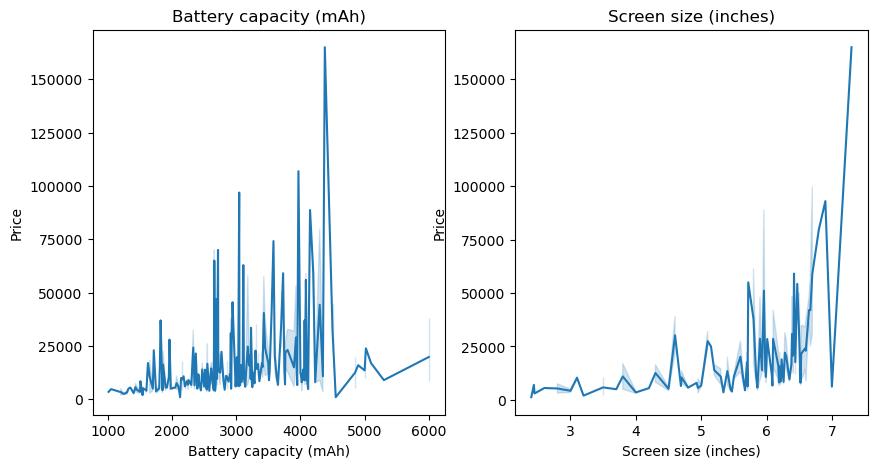

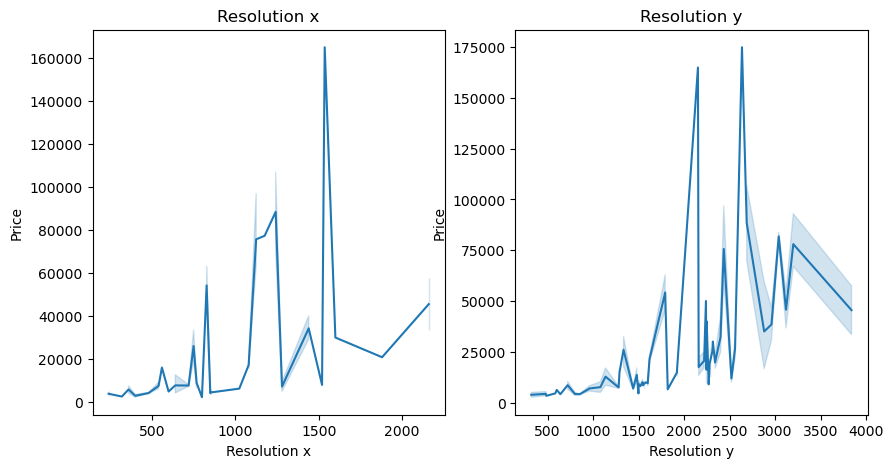

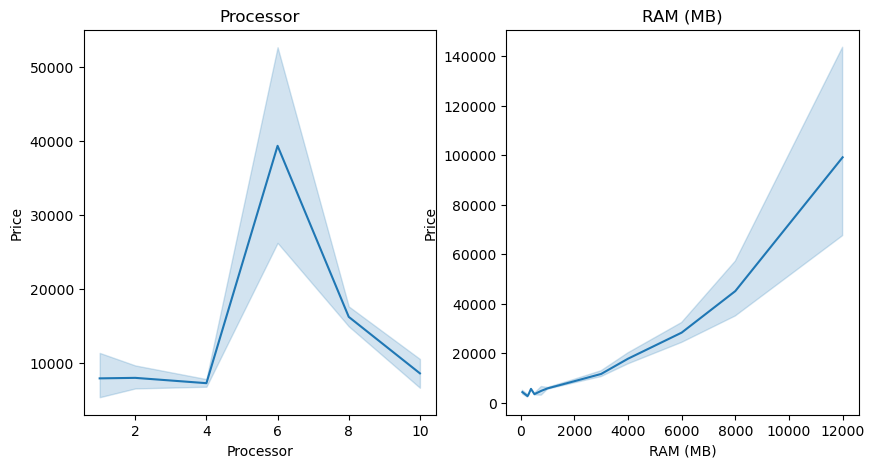

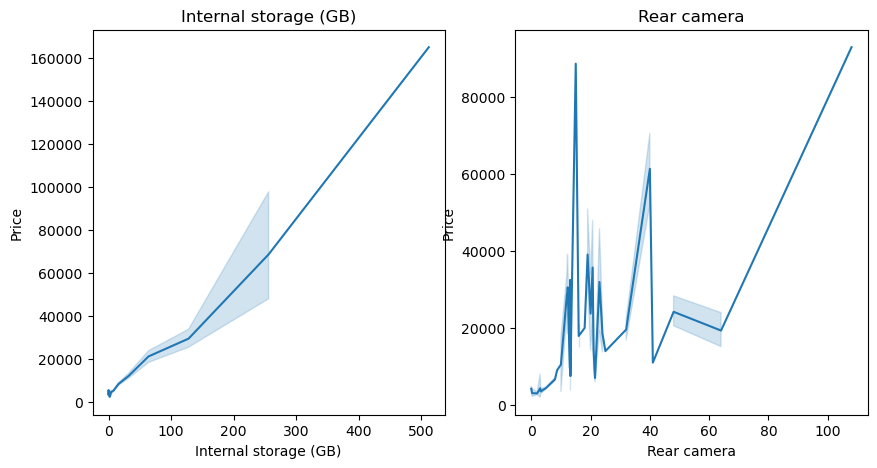

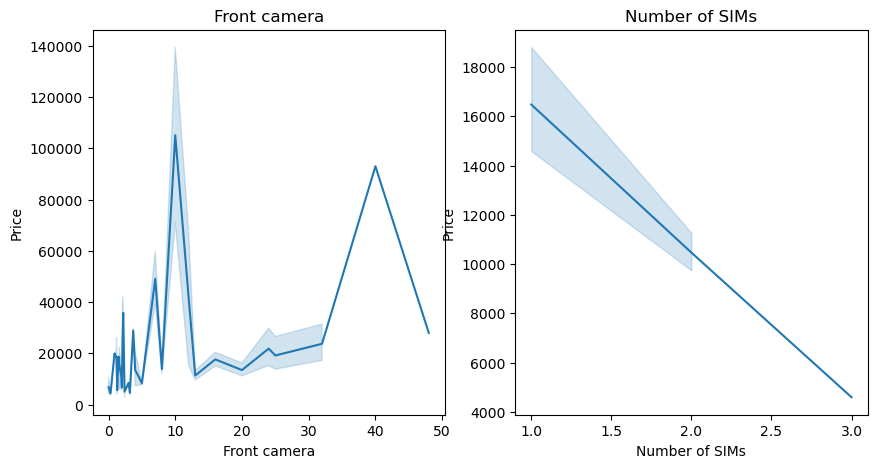

In [16]:
eda.colPrice() 

In [17]:
eda.calculateOutlires()
eda.outliresBox()

+------------------------+--------+--------+--------------------+-------+
|          Name          |   q1   |   q3   |        IQR         | Count |
| Battery capacity (mAh) | 2300.0 | 3500.0 |       1200.0       |   3   |
|  Screen size (inches)  |  5.0   |  5.7   | 0.7000000000000002 |  22   |
|      Resolution x      | 720.0  | 1080.0 |       360.0        |   3   |
|      Resolution y      | 1280.0 | 1920.0 |       640.0        |  21   |
|       Processor        |  4.0   |  8.0   |        4.0         |   0   |
|        RAM (MB)        | 1000.0 | 3000.0 |       2000.0       |  33   |
| Internal storage (GB)  |  8.0   |  32.0  |        24.0        |  79   |
|      Rear camera       |  8.0   |  13.0  |        5.0         |  91   |
|      Front camera      |  2.0   |  8.0   |        6.0         |  79   |
|     Number of SIMs     |  2.0   |  2.0   |        0.0         |  228  |
+------------------------+--------+--------+--------------------+-------+


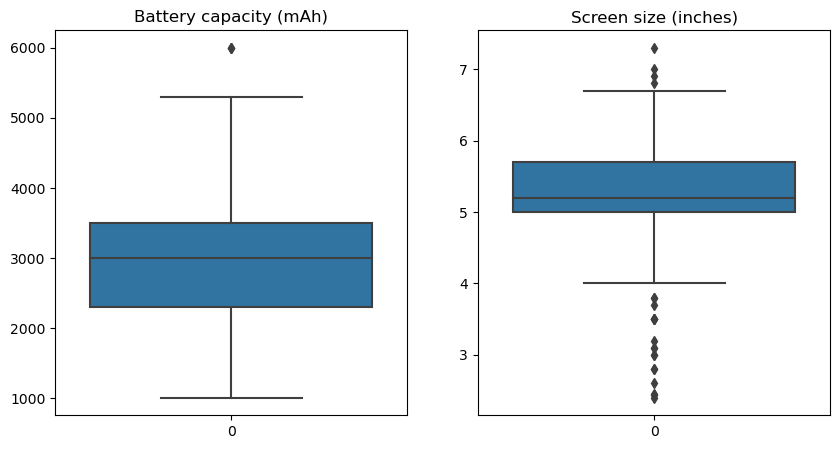

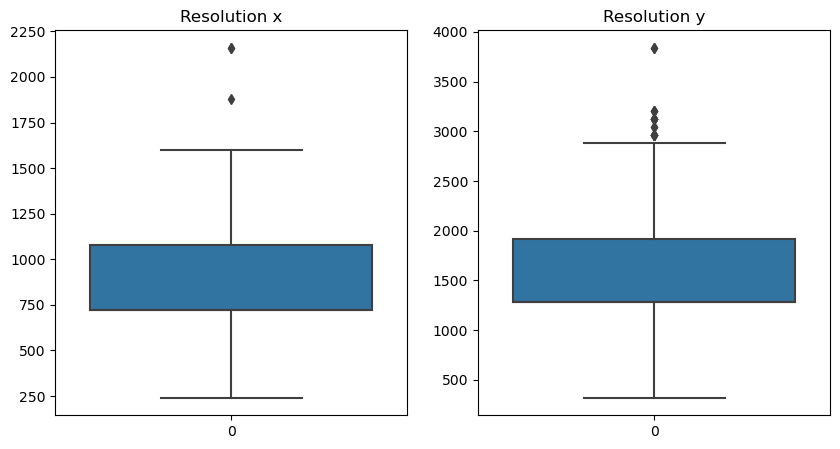

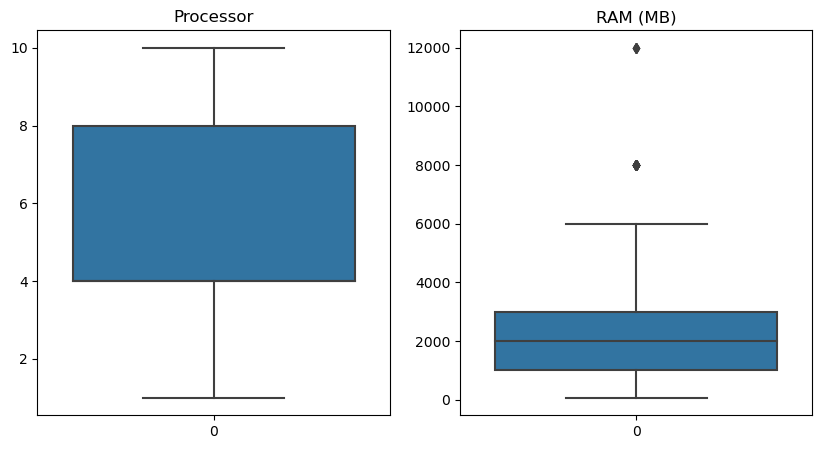

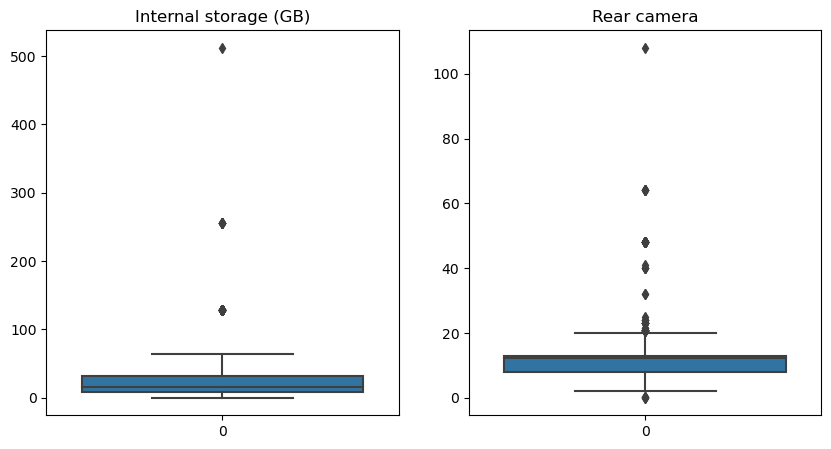

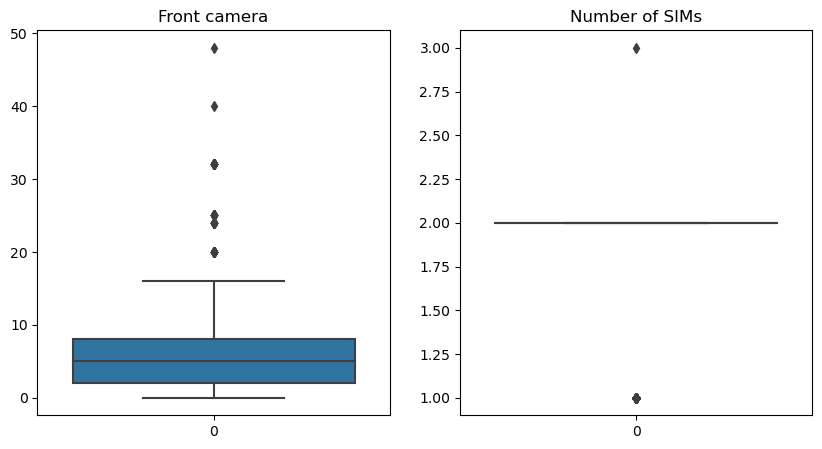

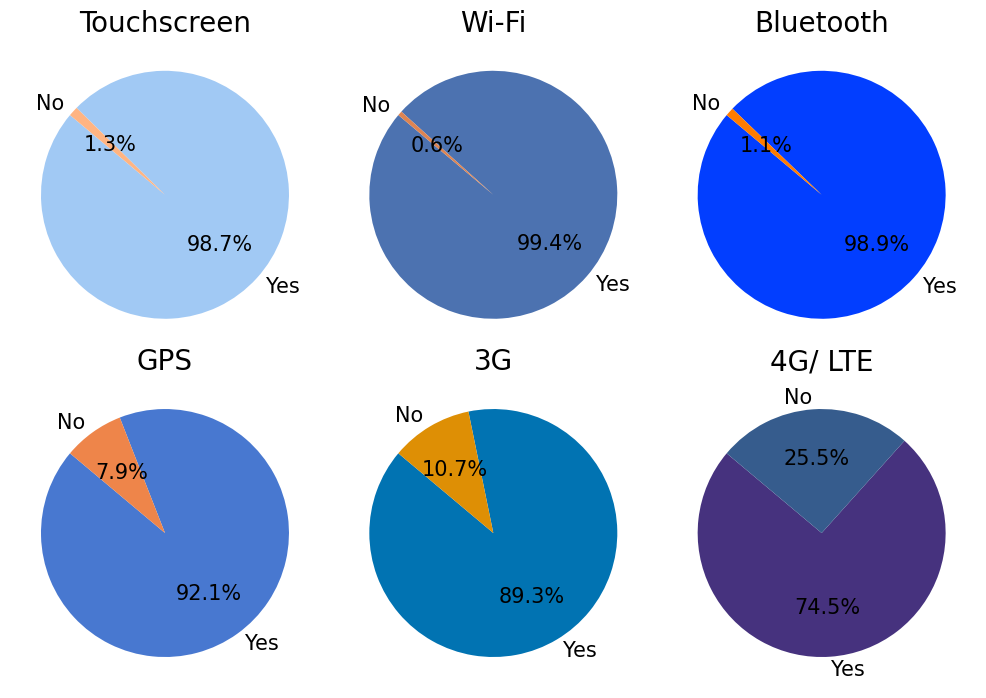

In [18]:
eda.bollValuePlot(catCols.drop(columns=['Brand', 'Model', 'Operating system']))

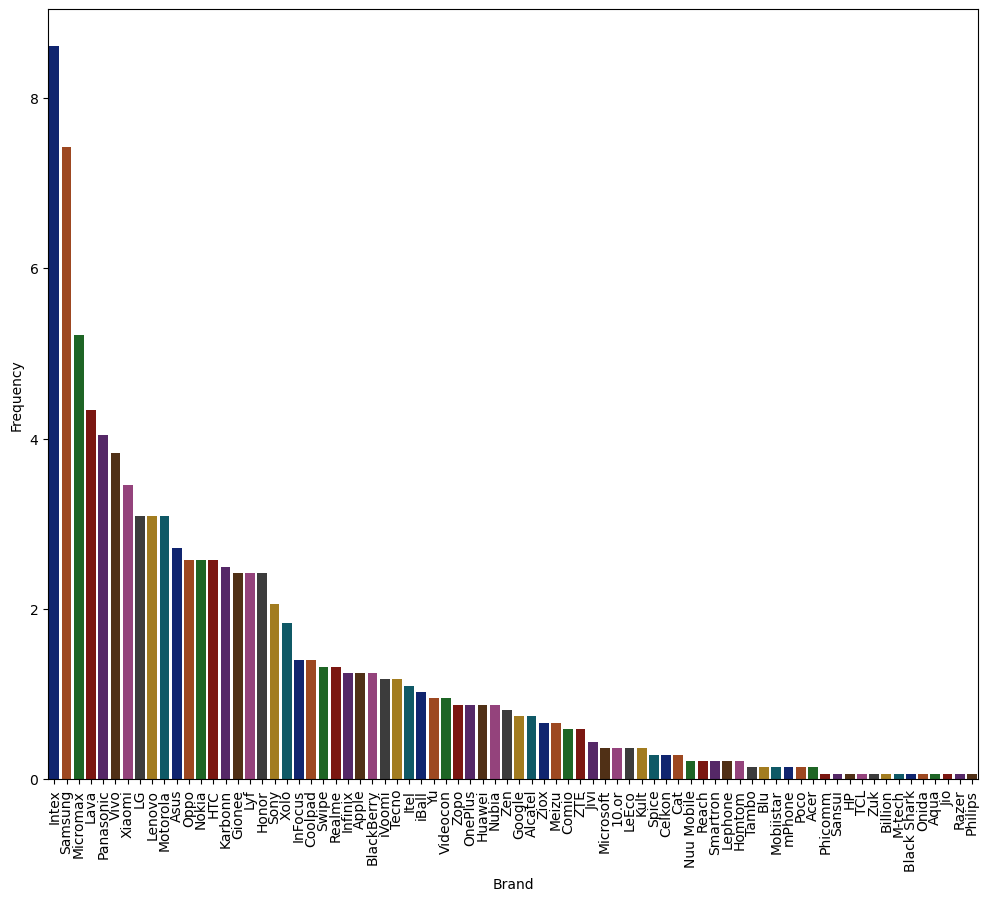

In [19]:
eda.FreCount(df['Brand'], (12, 10), 0)

In [20]:
df.head(2)

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999


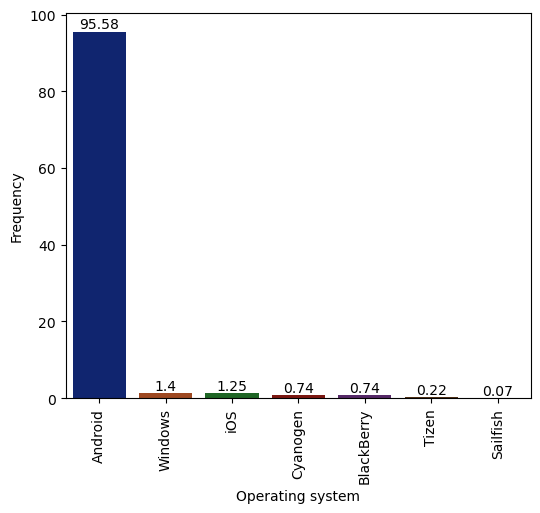

In [21]:
eda.FreCount(df['Operating system'], (6,5), 1)

In [35]:
eda.corr()

In [23]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


In [24]:
numeric_columns_=numcols.columns.tolist()

In [25]:
numeric_columns_

['Battery capacity (mAh)',
 'Screen size (inches)',
 'Resolution x',
 'Resolution y',
 'Processor',
 'RAM (MB)',
 'Internal storage (GB)',
 'Rear camera',
 'Front camera',
 'Number of SIMs',
 'Price']

In [26]:
categorical_columns_=catCols.columns.tolist()

In [27]:
categorical_columns_

['Brand',
 'Model',
 'Touchscreen',
 'Operating system',
 'Wi-Fi',
 'Bluetooth',
 'GPS',
 '3G',
 '4G/ LTE']

In [28]:
len(df.drop(columns='Name').columns.tolist())==len(numeric_columns_)+len(categorical_columns_)

True

In [42]:
class col_analyser:
    def __init__(self,data):
        """
        arg: dataframe to be processed for analysising the numeric and categorical columns

        function: class_constructor

        return: None
        """
        self.df=data
        
    def categorical_analyze(self):
        """
        arg: None

        function: detailed analysis (unique value and its count) of categorical columns present in the dataframe 

        return: dataframe describing each categorical variable characteristic --> used to transform for pre-processing 
        """
        self.categorical_columns=self.df.select_dtypes(include=['object']).columns.tolist()
        
        cat_tab=[]
        for i in self.categorical_columns:
            unique_element_counts=self.df[i].nunique()
            unique_elements=self.df[i].unique()
            cat_tab.append({'cat_column_name':i,'unique_value_counts':unique_element_counts,'unique_values':unique_elements})
        return pd.DataFrame(cat_tab)
    
    
    def numerical_analyze(self):
        """
        arg: None

        function: Visualizing the distribution and QQ plots to apply standradization on top of the numeric values before training

        return: None
        
        call: initiate the validation method 
        """
        self.numerical_columns=self.df.select_dtypes(include='number').columns.tolist()
        for i in self.numerical_columns:
            unique_element_counts=self.df[i].nunique()
            sns.set_style('darkgrid')
            fig,axs=plt.subplots(1,2,figsize=(14,6))
            sns.histplot(df[i],ax=axs[1])
            stats.probplot(df[i],plot=axs[0],fit=True)
            axs[0].set_title('QQ_plot')
            axs[1].set_title('distribution')
            fig.suptitle("numerical column analysis - {}".format(i))
            plt.tight_layout()
            plt.show()
        self.validation_()
        
      
    def validation_(self):

        """
        arg: None

        function: overall numeric and categorical columns post analysis

        return: None
        """
        print("Categorical columns are :{}".format(self.categorical_columns))
        print("numerical columns are :{}".format(self.numerical_columns))

    def correlation_with_target(self,df,target):

        """
        arg: dataframe on which correlation need to be applied
        arg: target column to calculate the correlation 

        function: correlation analysis (numeric values with respect to target variable)

        return: correlation values in descending (importance) order
        """
        return(df.corr()[target].round(3).sort_values(ascending=False))
    
    def possible_high_correlation(self,df):


        """
        arg: dataframe

        function: identifying features of high correlation

        return:  columns which are having possiblity of correlations
        """
        correlation_=df.corr()
        unique_columns_with_high_correlations=set()
        for i in range(len(correlation_.columns)):
            for j in range(i):
                if abs(correlation_.iloc[i,j])>0.6:
                    suspect_column=correlation_.columns[i]
                    unique_columns_with_high_correlations.add(suspect_column)
        return(unique_columns_with_high_correlations)
        

In [43]:
feature_analyze=col_analyser(df)

In [44]:
feature_analyze.categorical_analyze()

,cat_column_name,unique_value_counts,unique_values
0,Name,1359,"[OnePlus 7T Pro McLaren Edition, Realme X2 Pro..."
1,Brand,76,"[OnePlus, Realme, Apple, LG, Samsung, Asus, Xi..."
2,Model,1321,"[7T Pro McLaren Edition, X2 Pro, iPhone 11 Pro..."
3,Touchscreen,2,"[Yes, No]"
4,Operating system,7,"[Android, iOS, Cyanogen, BlackBerry, Windows, ..."
5,Wi-Fi,2,"[Yes, No]"
6,Bluetooth,2,"[Yes, No]"
7,GPS,2,"[Yes, No]"
8,3G,2,"[Yes, No]"
9,4G/ LTE,2,"[Yes, No]"


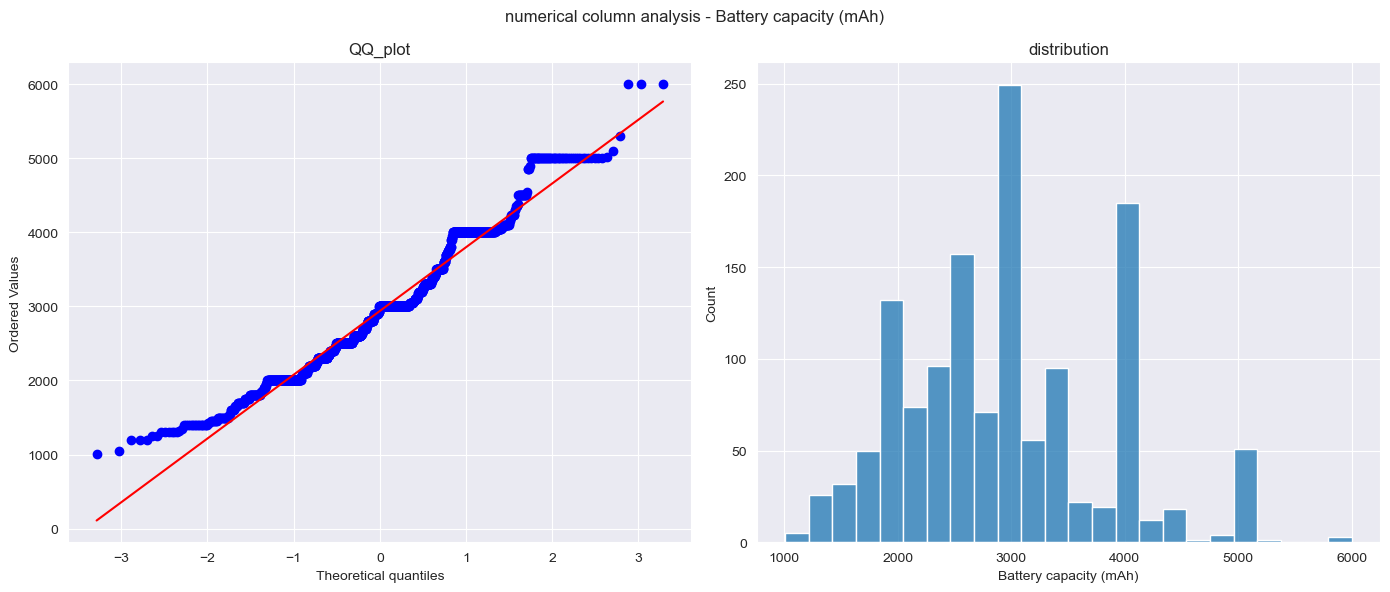

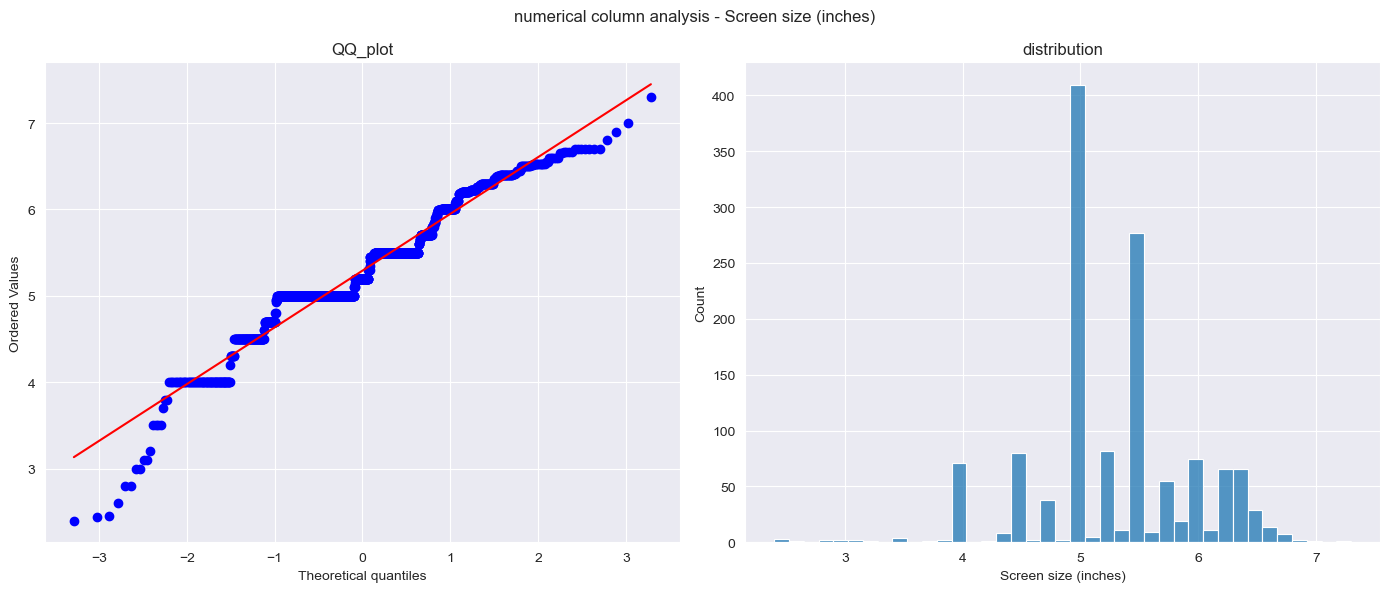

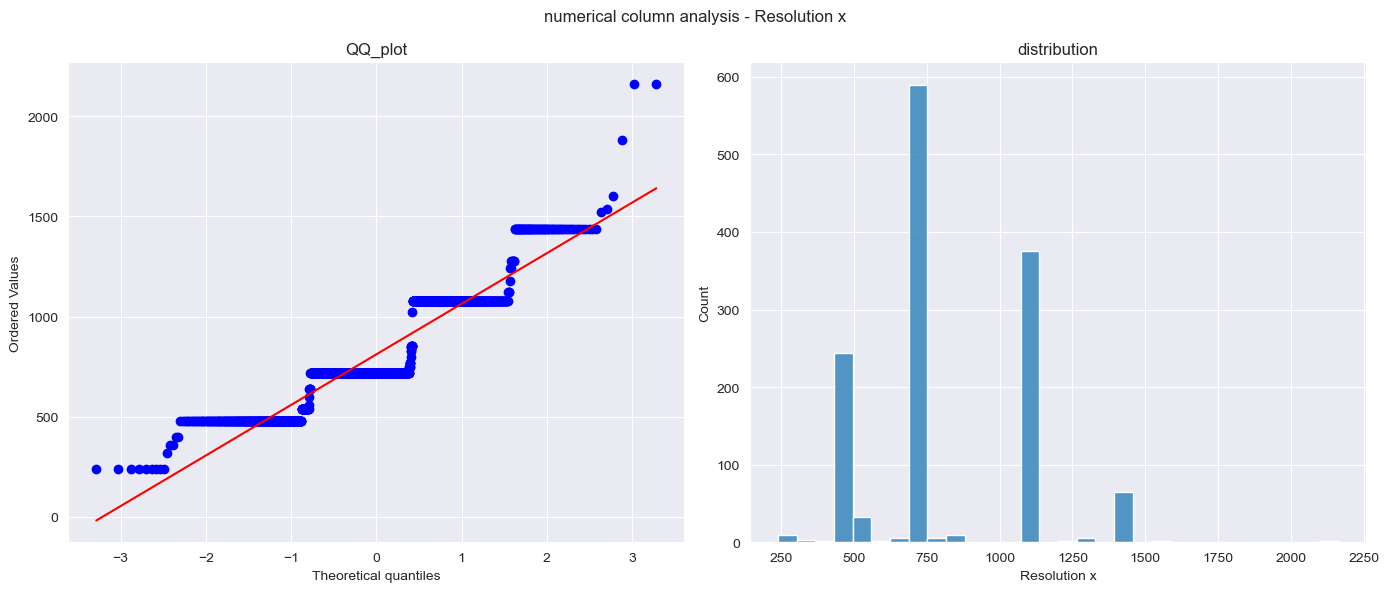

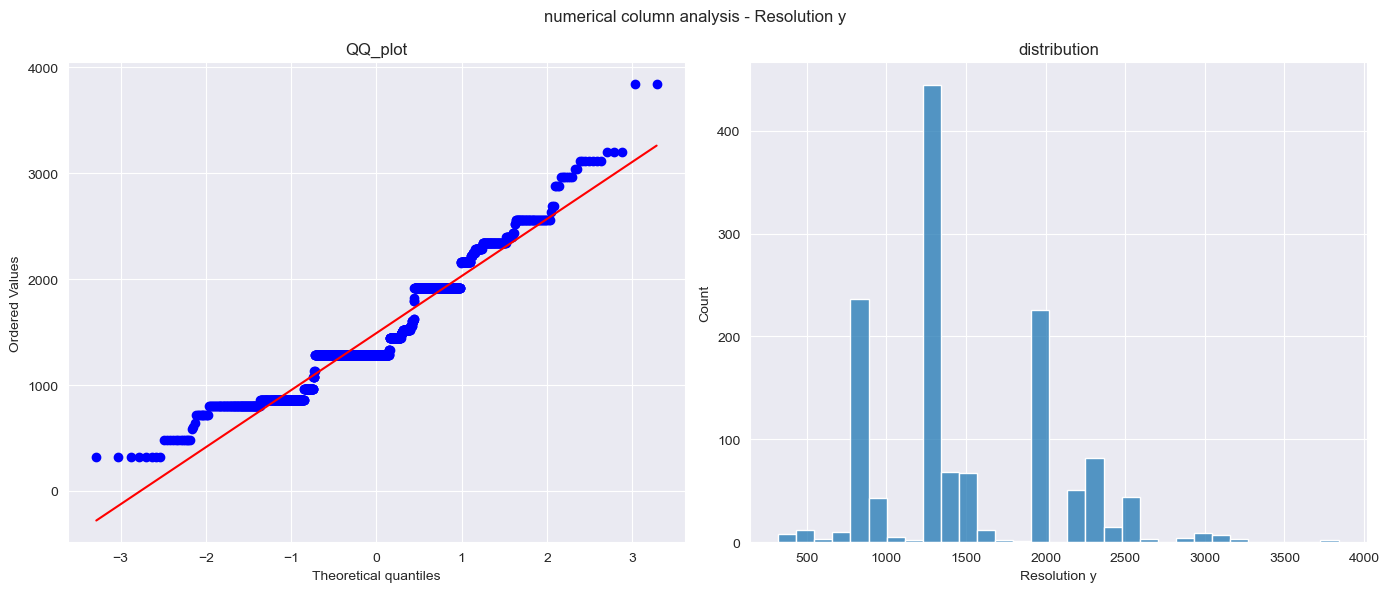

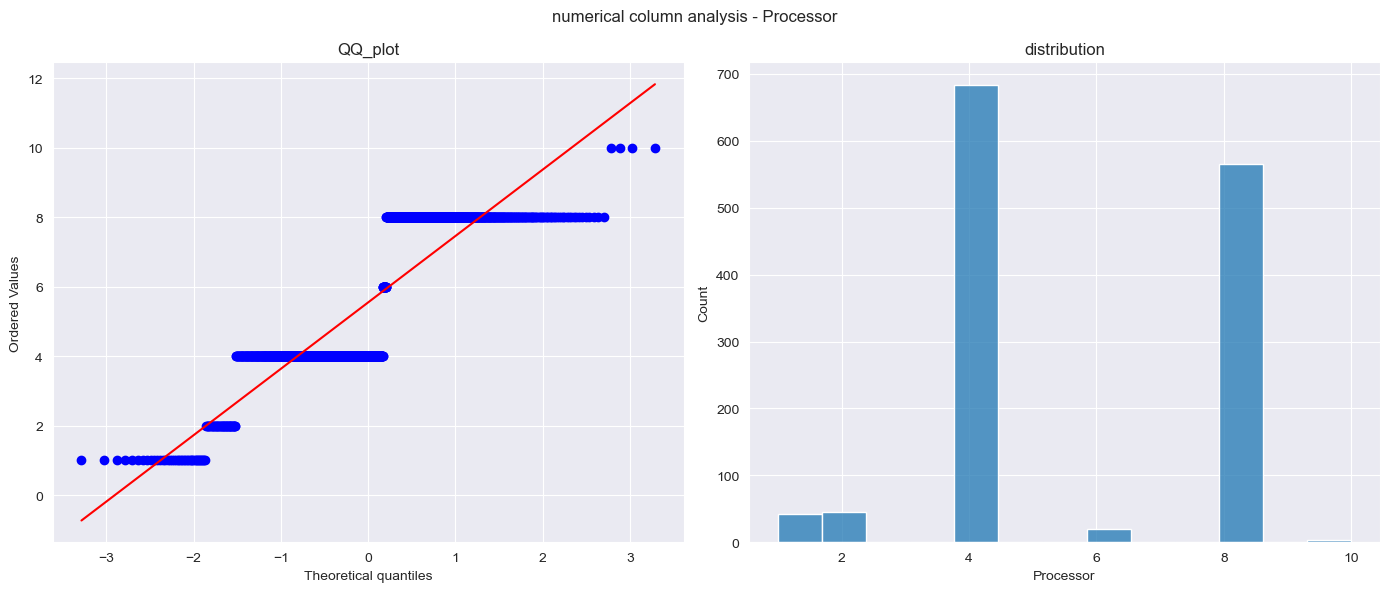

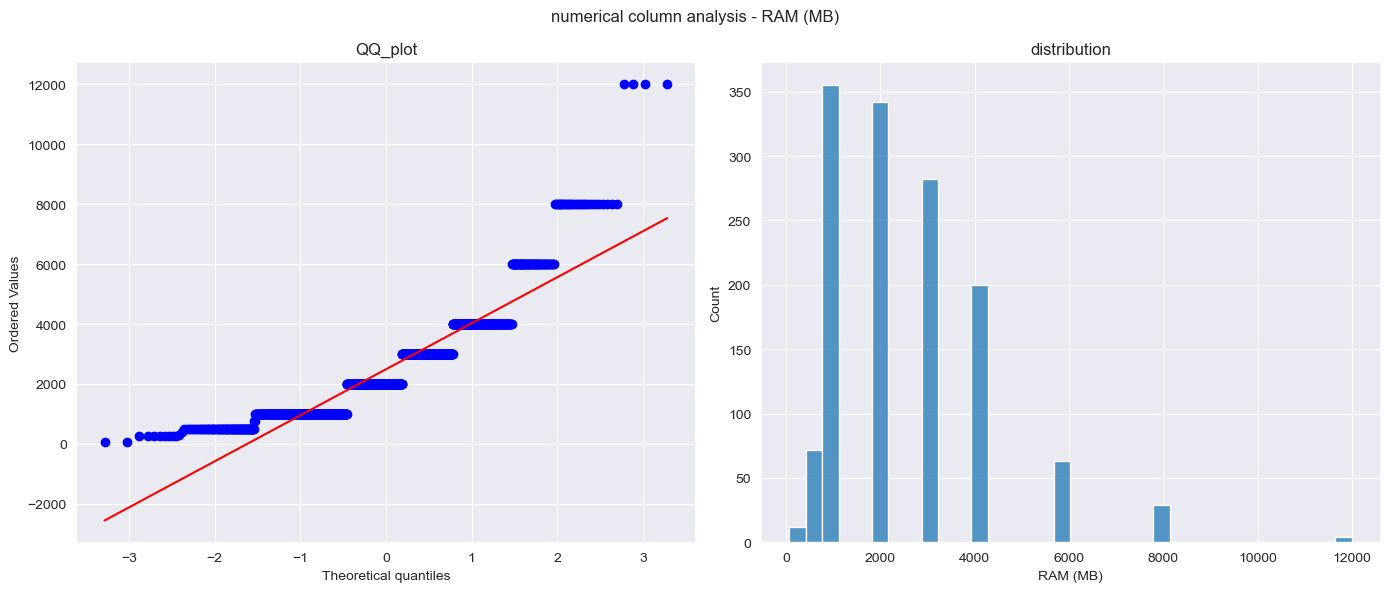

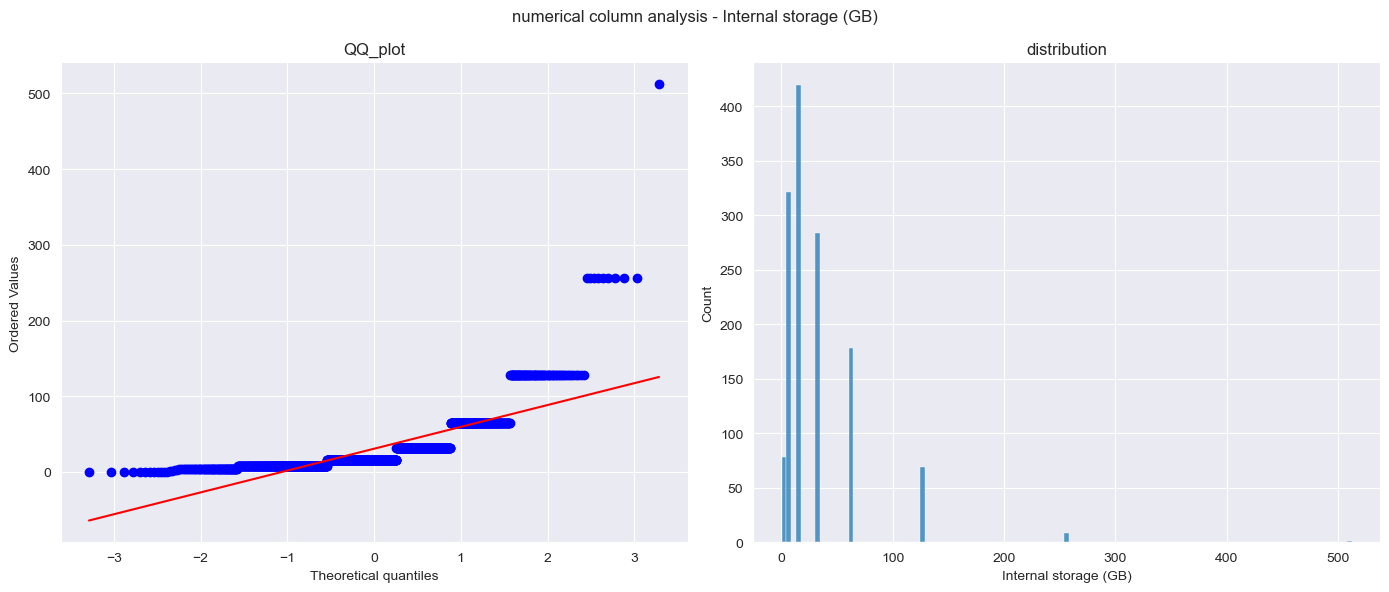

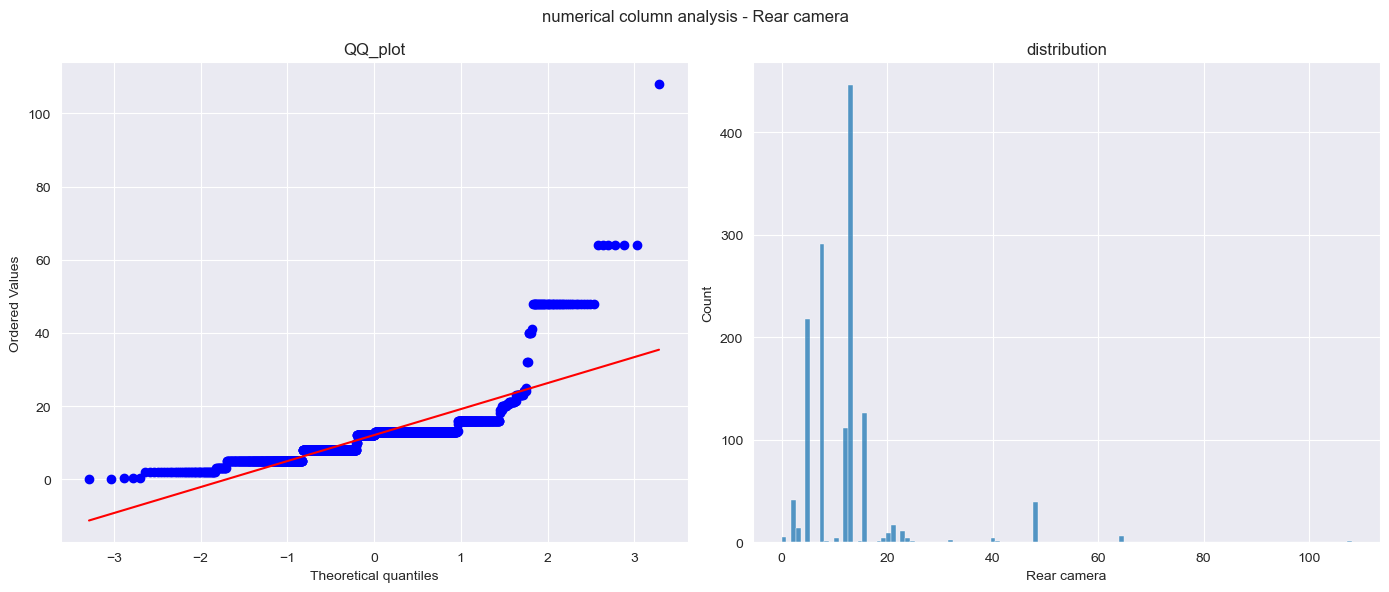

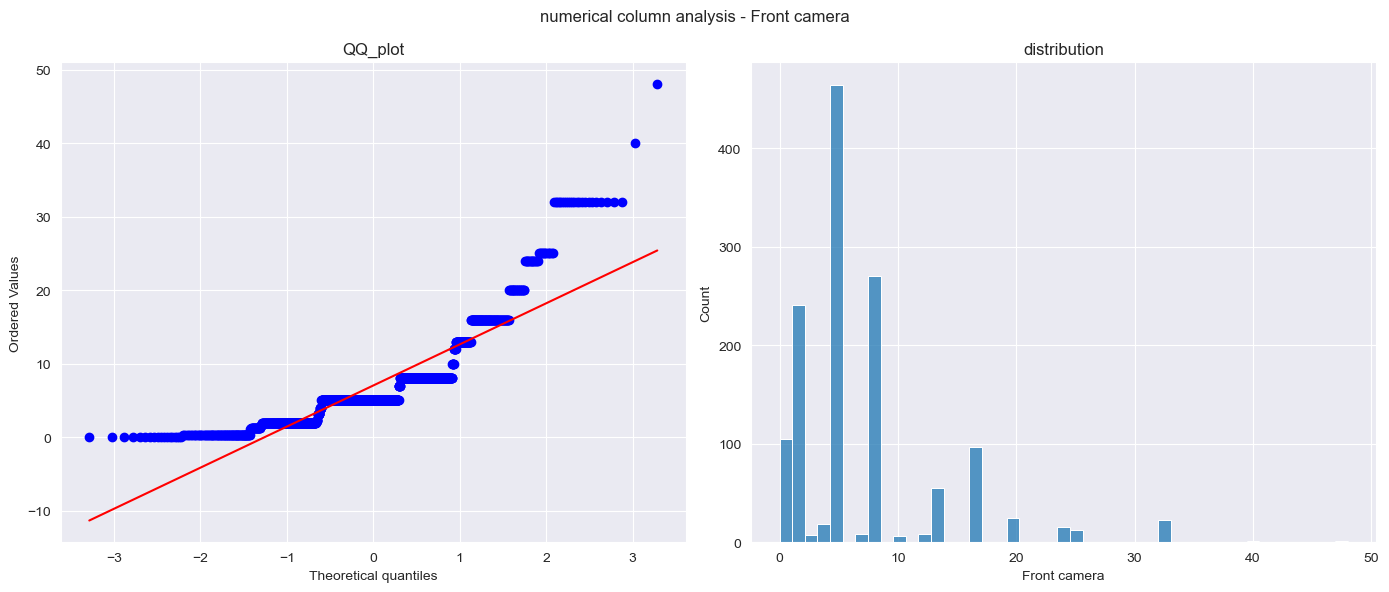

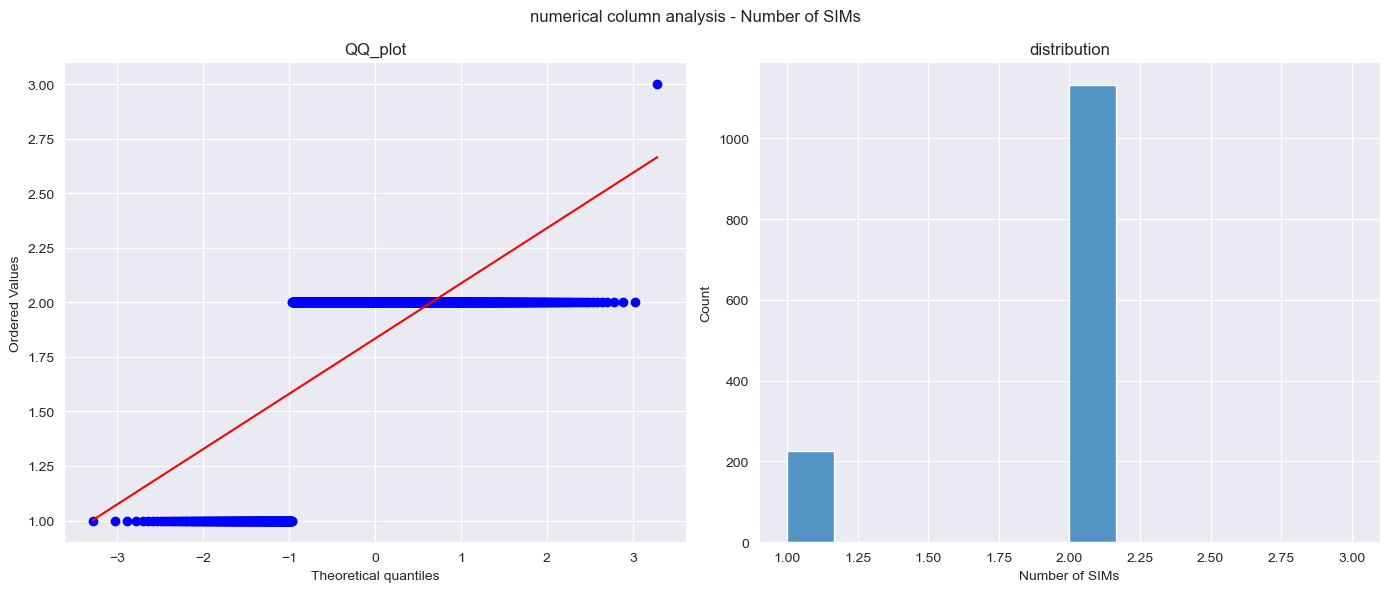

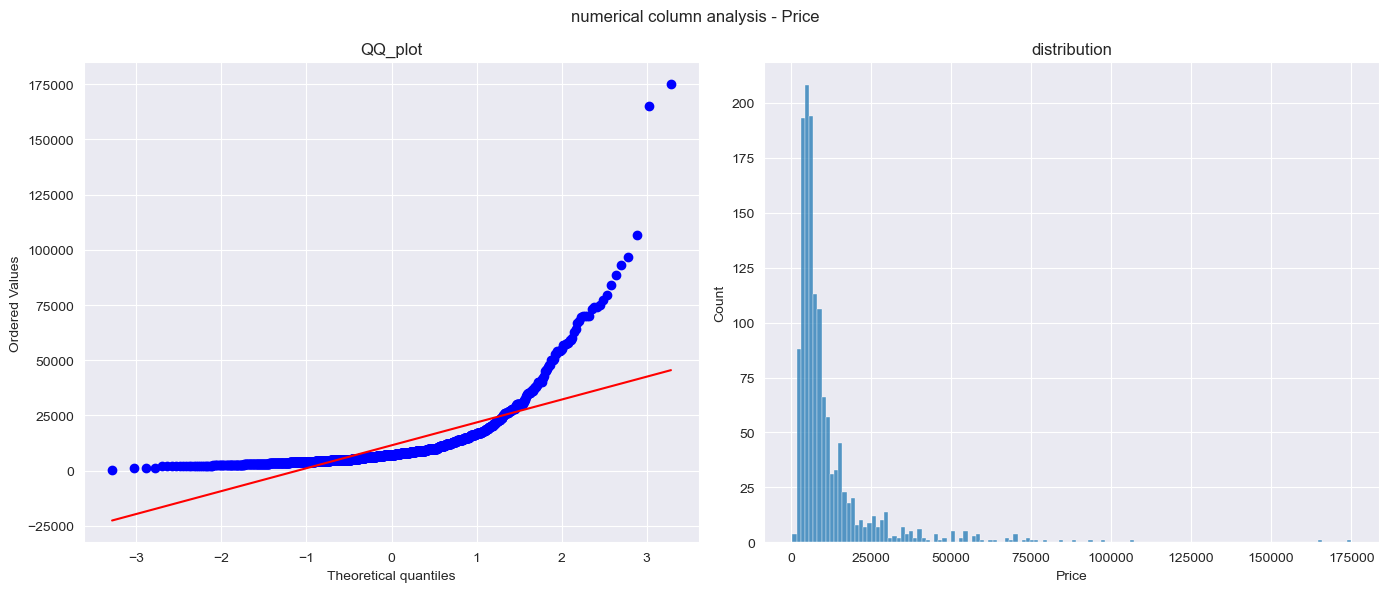

Categorical columns are :['Name', 'Brand', 'Model', 'Touchscreen', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']
numerical columns are :['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 'Front camera', 'Number of SIMs', 'Price']


In [45]:
feature_analyze.numerical_analyze()

In [46]:
feature_analyze.correlation_with_target(numcols,'Price')

Price                     1.000
Internal storage (GB)     0.644
RAM (MB)                  0.613
Resolution y              0.576
Resolution x              0.541
Screen size (inches)      0.402
Rear camera               0.379
Front camera              0.311
Processor                 0.302
Battery capacity (mAh)    0.298
Number of SIMs           -0.162
Name: Price, dtype: float64

In [47]:
feature_analyze.possible_high_correlation(numcols)

{'Front camera',
 'Internal storage (GB)',
 'Price',
 'Processor',
 'RAM (MB)',
 'Rear camera',
 'Resolution y',
 'Screen size (inches)'}

In [48]:
class preProcessing:
    def __init__(self, df):
        self.df = df
        
    def outlireHandeling(self, col):
        '''
            function: outlireHandeling -> Performs the log transformation on the columnn
            arg: col (pandas.core.series.Series) -> column of the data set
            return: 'This column does not exsist in data set' (str) -> if the column does not exsist
        '''
        if col not in self.df.columns.tolist():
            return 'This column does not exsist in data set'
        self.df['logTranforedPrice'] = round(np.log10(df[col] + 1),2)
        
    def log_tranformation(self,df):
        
        """
        arg: dataframe(numeric_columns_only)

        function: applying lograthemic transformation on all the numeric columns 

        return: None
        """
        for col in df:
            self.df[col]=self.df[col].map(lambda i: np.log(i) if i>0 else 0)
        
    def comparisionofResults(self, col1, col2):
        '''
            function: comparisionofResults -> shows the visual comaparision of two columns in two bar graph
            arg: col1 (pandas.core.series.Series) -> column of the data set
                 col2 (pandas.core.series.Series) -> column of the data set
            return: None
        '''
        fig, axes = plt.subplots(1, 2, figsize=(14, 4))
        plt.suptitle('Comparision of original price v/s log transformation', fontsize=20)
        sns.histplot(ax=axes[0], x=self.df['Price'], bins=70, kde=True, color=(0.95, 0.1, 0.85))
        axes[0].set_xlabel('Price', fontsize=15)
        axes[0].set_ylabel('Frequency', fontsize=15)
        sns.histplot(ax=axes[1], x=self.df['logTranforedPrice'], bins=50, kde=True, color=(0.2, 0.85, 0.95))
        axes[1].set_xlabel('Log Transformed Price', fontsize=15)
        axes[1].set_ylabel('Frequency', fontsize=15)
        plt.show()
        
    def labelEncoding(self, column):
        '''
            function: labelEncoding -> performs label encoding on the catagorical columns
            arg: column (pandas.core.indexes.base.Index) -> index of the columns 
            return: None
        '''
        labelEncoder = LabelEncoder()
        for col in column:
            self.df[col] = labelEncoder.fit_transform(self.df[col])

In [49]:
preprocess = preProcessing(df)

In [50]:
preprocess.log_tranformation(numcols.drop(columns='Price'))

In [51]:
preprocess.outlireHandeling('Price')

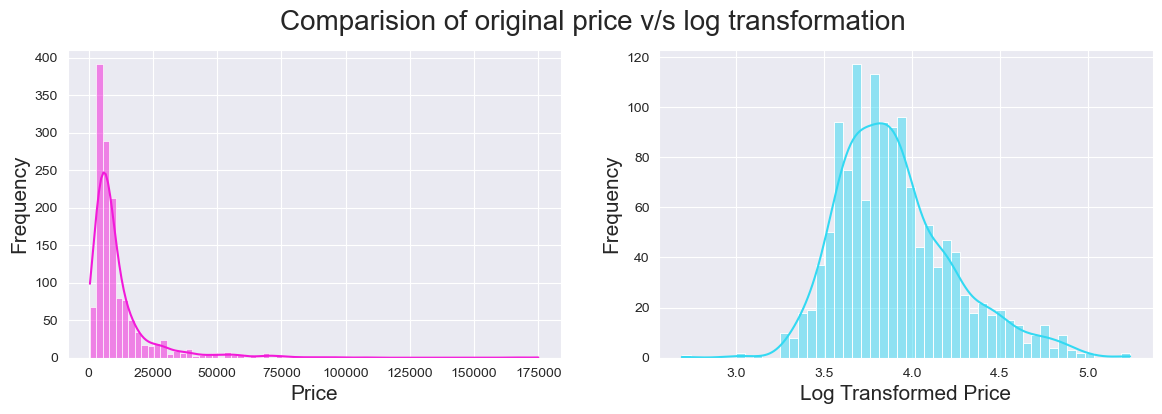

In [52]:
preprocess.comparisionofResults('Price', 'logTranforedPrice')

In [53]:
preprocess.labelEncoding(catCols.drop(columns=['Brand']).columns)

In [54]:
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price,logTranforedPrice
0,OnePlus 7T Pro McLaren Edition,OnePlus,49,8.315077,1.897620,1,7.272398,8.045588,2.079442,9.392662,...,2.772589,0,1,1,1,0.693147,1,1,58998,4.77
1,Realme X2 Pro,Realme,1142,8.294050,1.871802,1,6.984716,7.783224,2.079442,8.699515,...,2.772589,0,1,1,1,0.693147,1,1,27999,4.45
2,iPhone 11 Pro Max,Apple,1288,8.286269,1.871802,1,7.124478,7.896553,1.791759,8.294050,...,2.484907,6,1,1,1,0.693147,1,1,106900,5.03
3,iPhone 11,Apple,1286,8.042378,1.808289,1,6.719013,7.491088,1.791759,8.294050,...,2.484907,6,1,1,1,0.693147,1,1,62900,4.80
4,LG G8X ThinQ,LG,522,8.294050,1.856298,1,6.984716,7.757906,2.079442,8.699515,...,3.465736,0,1,1,1,0.000000,0,0,49990,4.70


In [59]:
class training_pipeline:
    def __init__(self,df,target,numeric,req_1,aplha):

        """
        arg: dataframe
        arg: target --> target variable
        arg: numeric --> numeric columns post_pre_processing and feature selection
        arg: req_1 --> required features for feature engineering
        arg: aplha --> alpha value for the regularizarion techniques

        function: class_constructor

        return: None
        """
        self.df=df
        self.target=target
        self.numeric=numeric
        self.combining_features_cat=req_1
        self.alpha=aplha
        self.results = []
        
    def process_module(self):

        """
        arg: None

        function: creating new feature (dimension reduction), process and traiing pipeline

        return: None
        """
        self.df['latest_tech_stack']=self.df[self.combining_features_cat].all(axis=1).astype(int)
        self.column_to_drop_trainig=['Name','Brand','Model','Touchscreen','Resolution y','Wi-Fi','Bluetooth','GPS','3G','4G/ LTE','Price','logTranforedPrice']
        self.X=self.df.drop(columns=self.column_to_drop_trainig)
        self.y=self.df[self.target]
        
        numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
        preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, self.numeric)])
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3, random_state=55)
        models = {'Linear Regression': LinearRegression(),'Random Forest Regressor': RandomForestRegressor(),'Gradient Boosting Regressor': GradientBoostingRegressor(),
                  'Ridge Regression': Ridge(alpha=self.alpha)}
        for model_name,model in models.items():
            pipeline=Pipeline(steps=[('preprocessor',preprocessor),('regressor',model)])
            pipeline.fit(X_train,y_train)
            
            y_train_pred=pipeline.predict(X_train)
            y_test_pred=pipeline.predict(X_test)
            #evaluation
            train_r2=r2_score(y_train,y_train_pred).round(3)
            test_r2=r2_score(y_test,y_test_pred).round(3)
            #eval_mse
            train_mse=mean_squared_error(y_train,y_train_pred).round(3)
            test_mse=mean_squared_error(y_test,y_test_pred).round(3)
            
            result={'model':model_name,'mse_train':train_mse,'mse_test':test_mse,'train_r2':train_r2,'test_r2':test_r2}
            self.results.append(result)
            
    def res_comp(self):

        """
        arg: None

        function: initializing and forming dataframe

        return: Evaluation metrics of the trained models
        """
        
        return pd.DataFrame(self.results)
        

In [60]:
numeric=['Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x','Processor', 'RAM (MB)', 'Internal storage (GB)','Rear camera', 'Front camera', 'Number of SIMs']
req_1=['Touchscreen', 'Wi-Fi', 'Bluetooth', 'GPS', '3G', '4G/ LTE']

In [61]:
model_training=training_pipeline(df,'logTranforedPrice',numeric,req_1,0.5)

In [62]:
model_training.process_module()

In [63]:
model_training.res_comp()

,model,mse_train,mse_test,train_r2,test_r2
0,Linear Regression,0.050,0.043,0.561,0.578
1,Random Forest Regressor,0.007,0.035,0.935,0.649
2,Gradient Boosting Regressor,0.025,0.036,0.775,0.638
3,Ridge Regression,0.050,0.043,0.561,0.578


# Remaining
- hyper parameter tuning and standarizing the pre_processing pipeline
- visualizing the model performance 
- experimenting with the feature set
- featre importance need to be added
